In [1]:
%matplotlib inline
import argparse
import csv
import logging
import os
import random
import sys
import pickle
import time
import numpy as np
from termcolor import colored
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats

In [2]:
SA_loo_dir = "from_aws/SA_loo_tagger_output_bert_e3_s?9*/"
NLI_loo_dir = "from_aws/NLI_loo_tagger_output_bert_e3_s?9*/"

In [18]:
def loo_effect_analysis(loo_dir):
    loo_most_effect_list = []
    loo_least_effect_list = []
    loo_zero_effect_list = []
    loo_random_effect_list = []
    for fn in list(glob.glob(loo_dir + 'loo_logits_test_*.pkl')):
        logits_list = pickle.load(open(fn, 'rb'))
        decision_logits = logits_list[4]
        decision = np.argmax(decision_logits)
        loo_most_inf_score = logits_list[0][decision]
        loo_least_inf_score = logits_list[1][decision]
        loo_zero_inf_score = logits_list[2][decision]
        loo_random_inf_score = logits_list[3][decision]
        reference_score = decision_logits[decision]
        loo_most_inf_effect = loo_most_inf_score - reference_score
        loo_least_inf_effect = loo_least_inf_score - reference_score
        loo_zero_inf_effect = loo_zero_inf_score - reference_score
        loo_random_inf_effect = loo_random_inf_score - reference_score
        loo_most_effect_list.append(loo_most_inf_effect)
        loo_least_effect_list.append(loo_least_inf_effect)
        loo_zero_effect_list.append(loo_zero_inf_effect)
        loo_random_effect_list.append(loo_random_inf_effect)
    print(np.mean(loo_most_effect_list) * 100, '%')
    print(np.mean(loo_least_effect_list) * 100, '%')
    print(np.mean(loo_zero_effect_list) * 100, '%')
    print(np.mean(loo_random_effect_list) * 100, '%')
    print()
    print(stats.sem(loo_most_effect_list) * 100, '%')
    print(stats.sem(loo_least_effect_list) * 100, '%')
    print(stats.sem(loo_zero_effect_list) * 100, '%')
    print(stats.sem(loo_random_effect_list) * 100, '%')
    
#     print(sns.utils.ci(sns.algorithms.bootstrap(loo_most_effect_list), which=68))
#     print(sns.utils.ci(sns.algorithms.bootstrap(loo_least_effect_list), which=68))
#     print(sns.utils.ci(sns.algorithms.bootstrap(loo_zero_effect_list), which=68))
#     print(sns.utils.ci(sns.algorithms.bootstrap(loo_random_effect_list), which=68))
    
    sns.pointplot(x=["most"]*len(loo_most_effect_list)+["least"]*len(loo_least_effect_list)+["zero"]*len(loo_zero_effect_list)+["random"]*len(loo_random_effect_list),
                  y=loo_most_effect_list+loo_least_effect_list+loo_zero_effect_list+loo_random_effect_list, ci=68)
    plt.show()

-6.003131717443466 %
0.1725735142827034 %
-1.2973222881555557 %
-1.6695301979780197 %

1.1218520451188598 %
0.5047892956286752 %
0.5411904559703867 %
0.5402532071643162 %


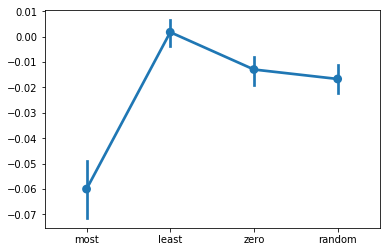

In [19]:
loo_effect_analysis(SA_loo_dir)

-11.618921905755997 %
2.0066410303115845 %
1.0062184184789658 %
0.12619824847206473 %

2.0886632960808003 %
1.436806334806592 %
0.9688315068352389 %
1.0677862165583418 %


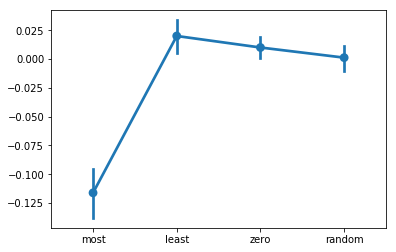

In [21]:
loo_effect_analysis(NLI_loo_dir)